In [1]:
import torch
import parameters_will
import torch.optim as optim
import RNN_Will as _model_
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Set up our parameters
params = parameters_will.default_params()

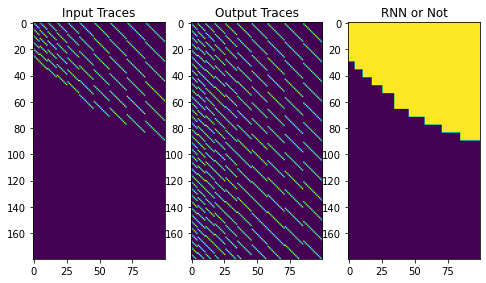

In [2]:
# Let's create some input and output traces
total_len = np.max(params.data.freqs)*(params.data.number_of_beats + params.data.minimal_number_of_pred)
params.model.seq_len = total_len

output_traces = np.zeros([total_len, np.sum(params.data.freqs)])
input_traces = np.zeros([total_len, np.sum(params.data.freqs)])
input_or_rnn = np.zeros([total_len, np.sum(params.data.freqs)])

counter = 0
for freq in params.data.freqs:
    for jitter in range(freq):
        number_of_predictions = int(np.floor((total_len-2-jitter)/freq+1))
        #print((number_of_predictions-1)*freq + jitter)
        output_traces[freq*np.arange(number_of_predictions) + jitter+1, counter] = 
        input_traces[freq*np.arange(params.data.number_of_beats) + jitter, counter] = 1
        input_or_rnn[:freq*(params.data.number_of_beats),counter] = 1
        counter+=1
    
plt.figure(figsize = (8,8))
plt.subplot(1,3,1)
plt.imshow(input_traces)
plt.title('Input Traces')

plt.subplot(1,3,2)
plt.imshow(output_traces)
plt.title('Output Traces')

plt.subplot(1,3,3)
plt.imshow(input_or_rnn)
plt.title('RNN or Not')

output_traces[:,3]

input_dict = parameters_will.DotDict()
input_dict.observation = torch.from_numpy(input_traces).type(torch.float32)
input_dict.outputs = torch.from_numpy(output_traces).type(torch.float32)
input_dict.input_or_rnn = torch.from_numpy(input_or_rnn).type(torch.float32)

In [32]:
np.arange(total_len)*freq/(2*np.pi)

array([  0.        ,   2.38732415,   4.77464829,   7.16197244,
         9.54929659,  11.93662073,  14.32394488,  16.71126902,
        19.09859317,  21.48591732,  23.87324146,  26.26056561,
        28.64788976,  31.0352139 ,  33.42253805,  35.8098622 ,
        38.19718634,  40.58451049,  42.97183463,  45.35915878,
        47.74648293,  50.13380707,  52.52113122,  54.90845537,
        57.29577951,  59.68310366,  62.07042781,  64.45775195,
        66.8450761 ,  69.23240024,  71.61972439,  74.00704854,
        76.39437268,  78.78169683,  81.16902098,  83.55634512,
        85.94366927,  88.33099342,  90.71831756,  93.10564171,
        95.49296586,  97.88029   , 100.26761415, 102.65493829,
       105.04226244, 107.42958659, 109.81691073, 112.20423488,
       114.59155903, 116.97888317, 119.36620732, 121.75353147,
       124.14085561, 126.52817976, 128.9155039 , 131.30282805,
       133.6901522 , 136.07747634, 138.46480049, 140.85212464,
       143.23944878, 145.62677293, 148.01409708, 150.40

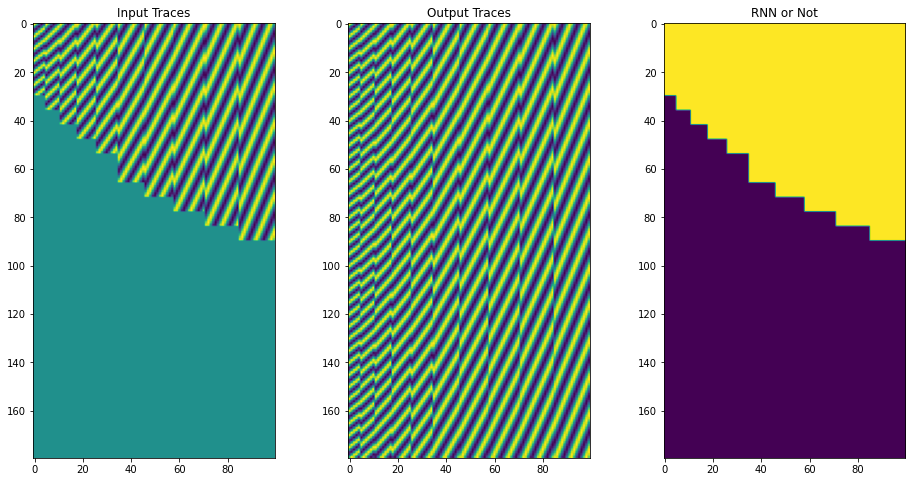

In [36]:
# Let's create some input and output traces
total_len = np.max(params.data.freqs)*(params.data.number_of_beats + params.data.minimal_number_of_pred)
params.model.seq_len = total_len

output_traces = np.zeros([total_len, np.sum(params.data.freqs)])
input_traces = np.zeros([total_len, np.sum(params.data.freqs)])
input_or_rnn = np.zeros([total_len, np.sum(params.data.freqs)])

counter = 0
for freq in params.data.freqs:
    for jitter in range(freq):
        number_of_predictions = int(np.floor((total_len-2-jitter)/freq+1))
        #print((number_of_predictions-1)*freq + jitter)
        output_traces[:, counter] = np.cos(np.arange(total_len)*2*np.pi/freq + jitter)
        input_traces[:freq*params.data.number_of_beats, counter] = np.cos(np.arange(freq*params.data.number_of_beats)*2*np.pi/freq + jitter)
        input_or_rnn[:freq*(params.data.number_of_beats),counter] = 1
        counter+=1
    
plt.figure(figsize = (16,8))
plt.subplot(1,3,1)
plt.imshow(input_traces)
plt.title('Input Traces')

plt.subplot(1,3,2)
plt.imshow(output_traces)
plt.title('Output Traces')

plt.subplot(1,3,3)
plt.imshow(input_or_rnn)
plt.title('RNN or Not')

output_traces[:,3]

input_dict = parameters_will.DotDict()
input_dict.observation = torch.from_numpy(input_traces).type(torch.float32)
input_dict.outputs = torch.from_numpy(output_traces).type(torch.float32)
input_dict.input_or_rnn = torch.from_numpy(input_or_rnn).type(torch.float32)

In [26]:
num_freqs = 3
freq_choices = np.random.randint(len(params.data.freqs), size = [batch_size, num_freqs])
freqs = np.array(params.data.freqs)[freq_choices]
jitter = np.random.randint(freqs)


for freq_ind in range(num_freqs):
    number_of_predictions = int(np.floor((total_len-2-jitter[0,freq_ind])/freqs[0,freq_ind]+1))
    print(number_of_predictions)

36
30
25


Text(0.5, 1.0, 'RNN or Not')

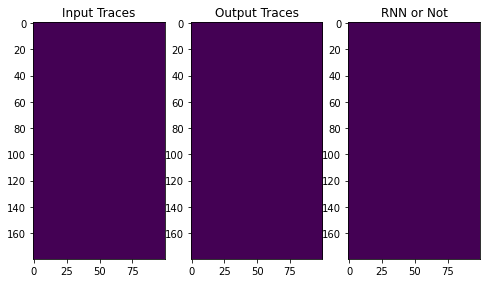

In [7]:
batch_size = 10
total_len = np.max(params.data.freqs)*(params.data.number_of_beats + params.data.minimal_number_of_pred)
params.model.seq_len = total_len

output_traces = np.zeros([total_len, batch_size])
input_traces = np.zeros([total_len, batch_size])
input_or_rnn = np.zeros([total_len, batch_size])



plt.figure(figsize = (8,8))
plt.subplot(1,3,1)
plt.imshow(input_traces)
plt.title('Input Traces')

plt.subplot(1,3,2)
plt.imshow(output_traces)
plt.title('Output Traces')

plt.subplot(1,3,3)
plt.imshow(input_or_rnn)
plt.title('RNN or Not')

In [121]:
path = '/Users/will/Documents/Inverse_Models/Periodic_RNNs/James_Network/'
name = 'performant_model_II'
path_name = path + name

In [122]:
model = torch.load(path_name)

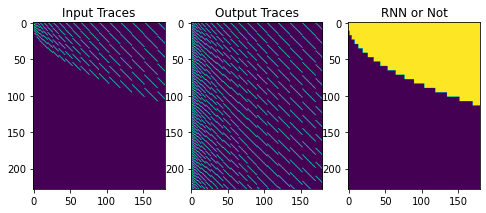

In [123]:
# Now test it on heldout frequencies
heldout_freqs = np.arange(2,20)
# heldout_freqs = [10]
total_len_heldout = np.max(heldout_freqs)*(params.data.number_of_beats + params.data.minimal_number_of_pred)
model.batch_size = len(heldout_freqs)

output_traces_heldout = np.zeros([total_len_heldout, np.sum(heldout_freqs)])
input_traces_heldout = np.zeros([total_len_heldout, np.sum(heldout_freqs)])
input_or_rnn_heldout = np.zeros([total_len_heldout, np.sum(heldout_freqs)])

counter = 0
for freq in heldout_freqs:
    for jitter in range(freq):
        number_of_predictions = int(np.floor((total_len_heldout-2-jitter)/freq+1))
        #print((number_of_predictions-1)*freq + jitter)
        output_traces_heldout[freq*np.arange(number_of_predictions) + jitter+1, counter] = 1
        input_traces_heldout[freq*np.arange(params.data.number_of_beats) + jitter, counter] = 1
        input_or_rnn_heldout[:freq*(params.data.number_of_beats),counter] = 1
        counter+=1
        
output_traces_heldout = output_traces_heldout[:,:total_len]
input_traces_heldout = input_traces_heldout[:,:total_len]
input_or_rnn_heldout = input_or_rnn_heldout[:,:total_len]

plt.figure(figsize = (8,8))
plt.subplot(1,3,1)
plt.imshow(input_traces_heldout)
plt.title('Input Traces')

plt.subplot(1,3,2)
plt.imshow(output_traces_heldout)
plt.title('Output Traces')

plt.subplot(1,3,3)
plt.imshow(input_or_rnn_heldout)
plt.title('RNN or Not')

offset_markers = [sum(heldout_freqs[:i]) for i in range(len(heldout_freqs))]
data_ids = np.random.randint(heldout_freqs) + offset_markers
input_dict.observation = torch.from_numpy(input_traces_heldout[:,data_ids]).type(torch.float32)
input_dict.input_or_rnn = torch.from_numpy(input_or_rnn_heldout[:,data_ids].T[:,:,None]).type(torch.float32)
input_dict.outputs = torch.from_numpy(output_traces_heldout[:,data_ids]).type(torch.float32)

# forward pass
variables = model(input_dict, device='cpu')

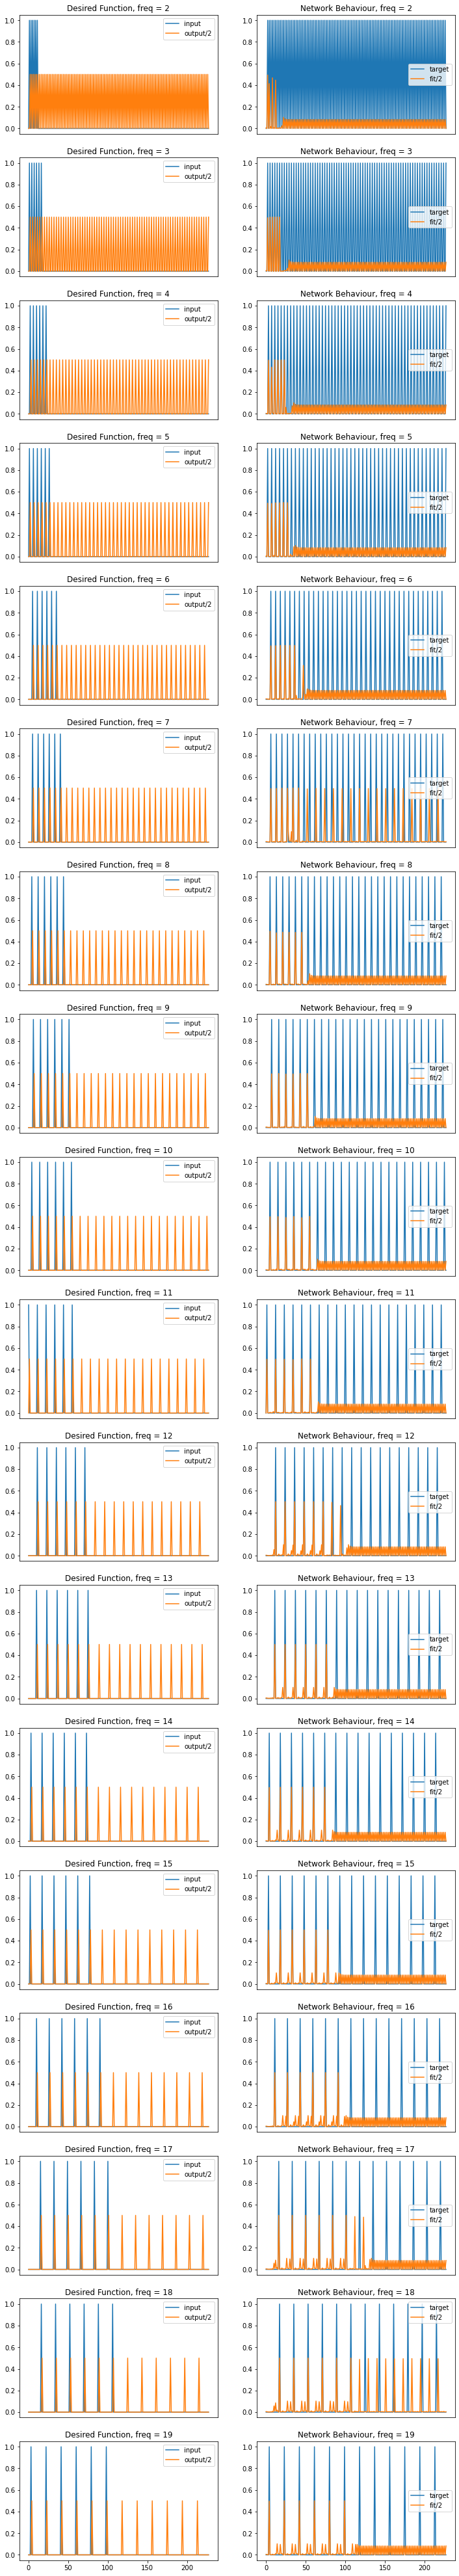

In [124]:
# Let's have a look at how one example is going
output = torch.stack(variables.pred)
plt.figure(figsize=(12,4*len(heldout_freqs)))

for sample in range(len(heldout_freqs)):
    plt.subplot(len(heldout_freqs),2,1+sample*2)
    plt.title(f'Desired Function, freq = {heldout_freqs[sample]}')
    plt.plot(input_dict.observation[:,sample],label='input')
    plt.plot(0.5*input_dict.outputs[:,sample],label='output/2')
    plt.legend()
    if sample < len(heldout_freqs)-1:
        plt.xticks([])

    plt.subplot(len(heldout_freqs),2,2+sample*2)
    plt.title(f'Network Behaviour, freq = {heldout_freqs[sample]}')
    plt.plot(input_dict.outputs[:,sample], label='target')
    plt.plot(0.5*output.detach().numpy()[:,sample,0], label = 'fit/2')
    plt.legend()
    if sample < len(heldout_freqs)-1:
        plt.xticks([])

In [119]:
clean_resp = torch.stack(variables.hidden)[:,4,:].detach().numpy()
clean_resp_demean = clean_resp - np.mean(clean_resp, axis = 0)
covariance_matrix = np.matmul(clean_resp_demean.T, clean_resp_demean)
eigvals, eigvecs = np.linalg.eig(covariance_matrix)
num = 2
eig_resp = np.matmul(clean_resp, eigvecs[:,:num])

0.9334257


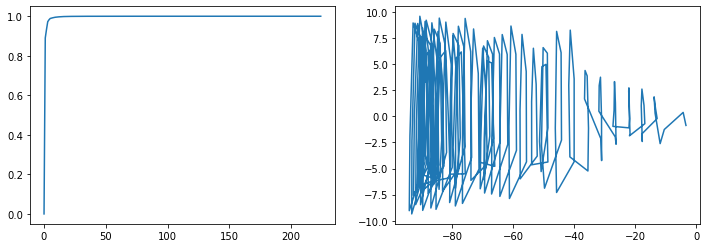

In [120]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot([np.sum(eigvals[:i])/np.sum(eigvals) for i in range(params.model.h_size)])
print(np.sum(eigvals[:2])/np.sum(eigvals))
plt.subplot(1,2,2)
plt.plot(eig_resp[:,0], eig_resp[:,1])

[0.0,
 0.8689762,
 0.9040042,
 0.93798834,
 0.9570153,
 0.97112787,
 0.9791195,
 0.9857081,
 0.9888896,
 0.99130666,
 0.99345624,
 0.9951646,
 0.9960898,
 0.9968124,
 0.99749154,
 0.99793994,
 0.9982931,
 0.9985341,
 0.9987255,
 0.9988736,
 0.9990111,
 0.99913,
 0.9992368,
 0.99933684,
 0.99941874,
 0.99949443,
 0.9995601,
 0.9996207,
 0.99966794,
 0.9997097,
 0.9997493,
 0.99978125,
 0.99980915,
 0.9998327,
 0.99985355,
 0.9998741,
 0.9998922,
 0.9999075,
 0.99991953,
 0.9999298,
 0.99993837,
 0.999947,
 0.99995387,
 0.9999592,
 0.9999642,
 0.9999685,
 0.99997246,
 0.9999762,
 0.9999795,
 0.9999826,
 0.999985,
 0.9999873,
 0.99998915,
 0.99999076,
 0.9999922,
 0.99999326,
 0.9999941,
 0.99999493,
 0.99999565,
 0.9999962,
 0.9999967,
 0.9999972,
 0.9999976,
 0.99999803,
 0.99999845,
 0.99999875,
 0.999999,
 0.9999992,
 0.99999934,
 0.99999946,
 0.9999996,
 0.99999964,
 0.99999976,
 0.9999998,
 0.9999999,
 0.99999994,
 0.99999994,
 0.99999994,
 0.99999994,
 0.99999994,
 1.0,
 1.0,
 1.0,

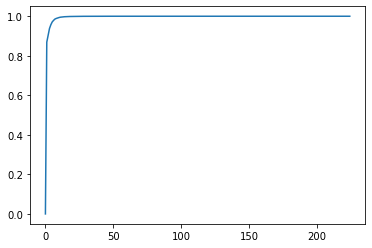

In [99]:
plt.plot([np.sum(eigvals[:i])/np.sum(eigvals) for i in range(params.model.h_size)])
[np.sum(eigvals[:i])/np.sum(eigvals) for i in range(params.model.h_size)]

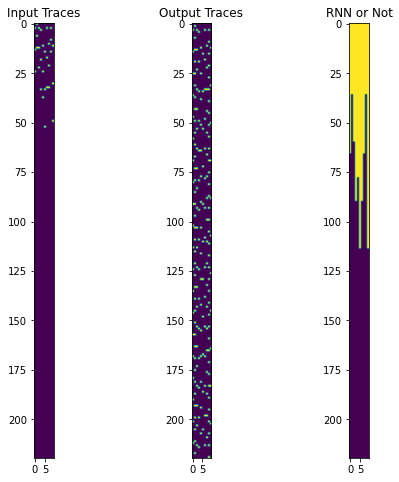

In [194]:
# New way to create data
min_length = 200
max_length = 300
batch_size = 10
min_beats = 3
max_beats = 6
min_freq = 5
max_freq = 20
params.data.data_type = 0

trial_len = min_length + np.random.randint(max_length - min_length)
number_of_beats = min_beats + np.random.randint(max_beats - min_beats)
freqs = min_freq + np.random.randint(max_freq-min_freq, size=[batch_size])
jitter = np.random.randint(freqs)

output_traces = np.zeros([trial_len, batch_size])
input_traces = np.zeros([trial_len, batch_size])
input_or_rnn = np.zeros([trial_len, batch_size])

counter = 0
for (freq_ind, freq) in enumerate(freqs):
    number_of_predictions = int(np.floor((trial_len-2-jitter[freq_ind])/freq+1))
    #print((number_of_predictions-1)*freq + jitter)
    if params.data.data_type == 0:
        output_traces[freq*np.arange(number_of_predictions) + jitter[freq_ind]+1, freq_ind] = 1
        input_traces[freq*np.arange(number_of_beats) + jitter[freq_ind], freq_ind] = 1
    elif params.data.data_type == 1:
        output_traces[:, freq_ind] = np.cos(np.arange(trial_len)*2*np.pi/freq + jitter)
        input_traces[:freq*number_of_beats, freq_ind] = np.cos(np.arange(freq*params.data.number_of_beats)*2*np.pi/freq + jitter)
    input_or_rnn[:freq*(params.data.number_of_beats),freq_ind] = 1
    
plt.figure(figsize = (8,8))
plt.subplot(1,3,1)
plt.imshow(input_traces)
plt.title('Input Traces')

plt.subplot(1,3,2)
plt.imshow(output_traces)
plt.title('Output Traces')

plt.subplot(1,3,3)
plt.imshow(input_or_rnn)
plt.title('RNN or Not')

output_traces[:,3]

input_dict = parameters_will.DotDict()
input_dict.observation = torch.from_numpy(input_traces).type(torch.float32)
input_dict.outputs = torch.from_numpy(output_traces).type(torch.float32)
input_dict.input_or_rnn = torch.from_numpy(input_or_rnn).type(torch.float32)
model.batch_size = batch_size
model.seq_len = trial_len

In [193]:
variables = model(input_dict, device='cpu')
# Let's have a look at how one example is going
output = torch.stack(variables.pred)
plt.figure(figsize=(12,4*len(heldout_freqs)))

for sample in range(len(heldout_freqs)):
    plt.subplot(len(heldout_freqs),2,1+sample*2)
    plt.title(f'Desired Function, freq = {heldout_freqs[sample]}')
    plt.plot(input_dict.observation[:,sample],label='input')
    plt.plot(0.5*input_dict.outputs[:,sample],label='output/2')
    plt.legend()
    if sample < len(heldout_freqs)-1:
        plt.xticks([])

    plt.subplot(len(heldout_freqs),2,2+sample*2)
    plt.title(f'Network Behaviour, freq = {heldout_freqs[sample]}')
    plt.plot(input_dict.outputs[:,sample], label='target')
    plt.plot(0.5*output.detach().numpy()[:,sample,0], label = 'fit/2')
    plt.legend()
    if sample < len(heldout_freqs)-1:
        plt.xticks([])

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/will/opt/anaconda3/envs/neural_rep_theo/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/7s/qvjsjmdx0xz163b26_jzw9300000gn/T/ipykernel_83931/1352585957.py", line 1, in <cell line: 1>
    variables = model(input_dict, device='cpu')
  File "/Users/will/opt/anaconda3/envs/neural_rep_theo/lib/python3.10/site-packages/torch/nn/modules/module.py", line 1501, in _call_impl
    return forward_call(*args, **kwargs)
  File "/Users/will/Documents/Inverse_Models/Periodic_RNNs/James_Network/RNN_Will.py", line 116, in forward
    hidden_input = inputs.input_or_rnn[i,:][:,None] * self.embedding(i_to_h[:,None]) + (1.0 - inputs.input_or_rnn[i,:][:,None]) *  self.embedding(pred)
  File "/Users/will/opt/anaconda3/envs/neural_rep_theo/lib/python3.10/site-packages/torch/nn/modules/module.py", line 1501, in _call_impl
    return forward_call(*args

In [178]:
#input_to_hidden = inputs.observation.reshape((-1, self.par.i_size)).reshape((self.seq_len, self.batch_size, -1))
inputs = input_dict
input_to_hidden = inputs.observation[:,:,None]

# initialise hidden
h = model.activation(model.hidden_init.tile([model.batch_size, 1]))  # (can remove activation here)
pred = model.predict(h)
hs, preds = [], []

# Run RNN
for i, (i_to_h) in enumerate(input_to_hidden):
    # this is your thing to gate the input (you need to specify inputs.input_or_rnn which is batch x seq_len x 1
    input_or_rnn = inputs.input_or_rnn[i,:] * model.embedding(i_to_h) + (1.0 - inputs.input_or_rnn[i,:]) * pred
    # path integrate (generative)
    h = model.activation(model.transition(h) + input_or_rnn)
    # store rnn hidden states
    hs.append(h)

    # prediction (this makes a prediction for next time-step (can add activation post transition if you want))
    pred = model.out_activation(model.predict(h))
    # store rnn hidden states
    preds.append(pred)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x1 and 100x1)

In [169]:
input_or_rnn.shape

torch.Size([10, 274])

In [172]:
inputs.input_or_rnn[:,i].shape

torch.Size([274])

In [174]:
i_to_h.shape

torch.Size([10, 1])

In [180]:
inputs.input_or_rnn[i,:].shape

torch.Size([10])

In [183]:
model.embedding(i_to_h.T).shape

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x10 and 100x1)

In [187]:
model.embedding(i_to_h[None,:,:])

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x1 and 100x1)

In [190]:
model.embedding(torch.zeros([10]))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x10 and 100x1)

In [192]:
model.embedding

Linear(in_features=100, out_features=1, bias=True)